## Import pandas and pyplot

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

## Import the data
Subplots are often used to compare the same measure across multiple members of a group. Here, the pollution DF has been split for you by site number. It has also been filtered to cover only the year 2013, and there are no duplicate dates. 

filenames are:
'pollution_site_1002.csv'
'pollution_site_4002.csv'
'pollution_site_4006.csv'
'pollution_site_8001.csv'

In [19]:
pollution_df_1002 = pd.read_csv('pollution_site_1002.csv')
pollution_df_4002 = pd.read_csv('pollution_site_4002.csv')
pollution_df_4006 = pd.read_csv('pollution_site_4006.csv')
pollution_df_8001 = pd.read_csv('pollution_site_8001.csv')

In [29]:
# need to resave csvs remembering to set index=False so we don't get the unnamed columns
pollution_df_1002.head()

,Unnamed: 0,Site Num,Address,County,City,Date Local,NO2 Units,NO2 Mean,O3 Units,O3 Mean,SO2 Units,SO2 Mean,CO Units,CO Mean
0,2588,1002,"228 W. PALM AVE., BURBANK",Los Angeles,Burbank,2013-01-01,Parts per billion,24.454545,Parts per million,0.013292,Parts per billion,0.286364,Parts per million,1.054545
1,2592,1002,"228 W. PALM AVE., BURBANK",Los Angeles,Burbank,2013-01-02,Parts per billion,33.217391,Parts per million,0.011292,Parts per billion,0.469565,Parts per million,1.039130
2,2596,1002,"228 W. PALM AVE., BURBANK",Los Angeles,Burbank,2013-01-03,Parts per billion,34.239130,Parts per million,0.011292,Parts per billion,0.686957,Parts per million,1.117391
3,2600,1002,"228 W. PALM AVE., BURBANK",Los Angeles,Burbank,2013-01-04,Parts per billion,34.931818,Parts per million,0.011583,Parts per billion,0.672727,Parts per million,1.118182
4,2604,1002,"228 W. PALM AVE., BURBANK",Los Angeles,Burbank,2013-01-05,Parts per billion,33.339130,Parts per million,0.010417,Parts per billion,0.517391,Parts per million,1.113043


## Make stacked subplots

Create a pair of subplots showing the change in O3 Mean over time for sites 1002 and 4002.
You can use the following function on the dataframes to convert Date Local to a datetime and
sort the DF in order by date.


In [24]:
# This code should be visible to students in the activity--
# it's not something they need to write; instead they should be provided with it. 

def handle_dates(df):
    df["Date Local"] = pd.to_datetime(df["Date Local"])
    df.sort_values("Date Local", inplace = True)
    return df

# example of how to use the function
pollution_df_1002 = handle_dates(pollution_df_1002)

In [25]:
# then go back to blank cells for them to do the work themselves. 
pollution_df_4002 = handle_dates(pollution_df_4002)
pollution_df_4006 = handle_dates(pollution_df_4006)
pollution_df_8001 = handle_dates(pollution_df_8001)

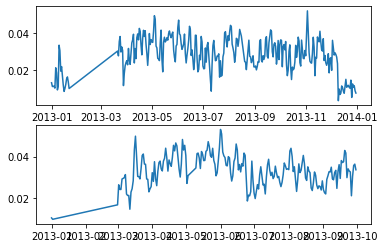

In [27]:
fig, axs = plt.subplots(2)
axs[0].plot(pollution_df_1002["Date Local"], pollution_df_1002["O3 Mean"])
axs[1].plot(pollution_df_4002["Date Local"], pollution_df_4002["O3 Mean"])

## Customize subplots
* make the figsize (12, 8)
* set both x and y axis to be the same on both plots
* change the line color of one of the plots to 'tab:red'
* label the x and y axis
* give the chart a title using the following code on the line directly below the call to plt.subplots():<br>
`fig.suptitle("CO2 Measurements, 2013, Sites 1002 and 4002")`

We probably want to explain what's going on with the staight lines (it's because data is missing for those dates, and rather than go back down to zero where data is missing, mpl just connects to the next point in the DF (which makes sense -- mpl doesn't know we are trying to plot consecutive dates)

Could also test out whether other sites or other pollution types don't have these missing values. 

Text(0, 0.5, 'CO2 (ppm): Site 4006')

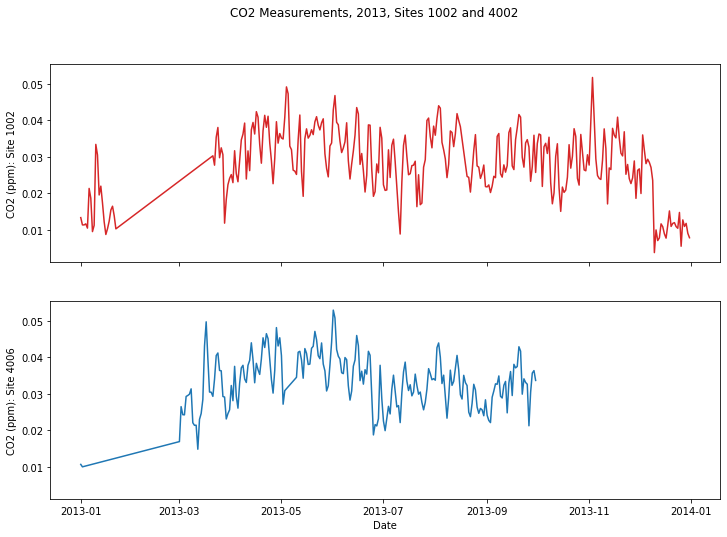

In [32]:
fig, axs = plt.subplots(2, figsize=(12,8), sharex=True, sharey=True)
fig.suptitle("CO2 Measurements, 2013, Sites 1002 and 4002")
axs[0].plot(pollution_df_1002["Date Local"], pollution_df_1002["O3 Mean"], color='tab:red')
axs[1].plot(pollution_df_4002["Date Local"], pollution_df_4002["O3 Mean"])
axs[1].set_xlabel("Date")
axs[0].set_ylabel("CO2 (ppm): Site 1002")
axs[1].set_ylabel("CO2 (ppm): Site 4006")


## Make side-by-side subplots

You can also make subplots from the same dataframe comparing different measures within that dataframe.


Make side-by-side histograms for site 4006 showing the distribution of "NO2 Mean" (on the left) and "SO2 Mean" (on the right).

(array([87., 47., 54., 46., 42., 26., 11.,  4.,  3.,  1.]),
 array([0.       , 0.3872727, 0.7745454, 1.1618181, 1.5490908, 1.9363635,
        2.3236362, 2.7109089, 3.0981816, 3.4854543, 3.872727 ]),
 <a list of 10 Patch objects>)

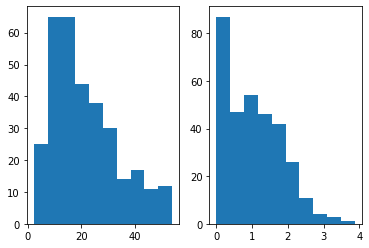

In [33]:
fig, axs = plt.subplots(1,2)
axs[0].hist(pollution_df_4006["NO2 Mean"])
axs[1].hist(pollution_df_4006["SO2 Mean"])

## Customize subplots
* figsize to (10,6)
* edgecolor white
* shared y axis (ONLY) 
* set one hist's color to 'tab:red'
* x axis labels for both histograms
* suptitle for figure as shown above
* NEW USE of the bins parameter: you can pass it an integer instead of a list. This integer will determine the number of bins to use. Set it equal to 10 for both plots. 



Text(0.5, 0, 'SO2 Mean (ppb)')

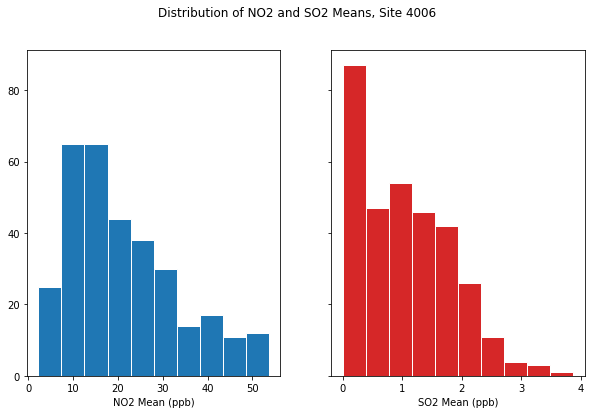

In [42]:
fig, axs = plt.subplots(1,2, figsize=(10,6), sharey=True)
fig.suptitle("Distribution of NO2 and SO2 Means, Site 4006")
axs[0].hist(pollution_df_4006["NO2 Mean"], 
            edgecolor='white',
            bins=10)
axs[1].hist(pollution_df_4006["SO2 Mean"],
            edgecolor='white',
            bins=10,
            color='tab:red')
axs[0].set_xlabel("NO2 Mean (ppb)")
axs[1].set_xlabel("SO2 Mean (ppb)")


## Make a grid of subplots

Make a 2x2 grid of subplots. For each site, create a scatterplot comparing NO2 Mean and CO Mean.


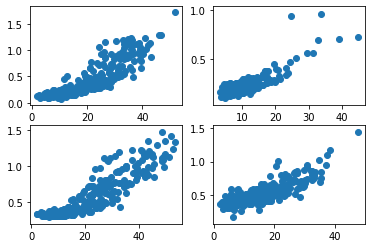

In [47]:
fig, axs = plt.subplots(2,2)
axs[0][0].scatter(pollution_df_1002["NO2 Mean"], pollution_df_1002["CO Mean"])
axs[0][1].scatter(pollution_df_4002["NO2 Mean"], pollution_df_4002["CO Mean"])
axs[1][0].scatter(pollution_df_4006["NO2 Mean"], pollution_df_4006["CO Mean"])
axs[1][1].scatter(pollution_df_8001["NO2 Mean"], pollution_df_8001["CO Mean"])

## Customize subplot grid
* figsize to (14, 14)
* shared x and y axis 
* utilize fig.suptitle()
* each has a different color from this list: {'tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:gray', 'tab:olive', 'tab:cyan'}
* size of markers = 100 (s parameter)
* opacity of markers = 0.2
* label the x and y axis of the lower lefthand plot ONLY
* give each subplot a title listing the site number

Text(0.5, 1.0, '8001')

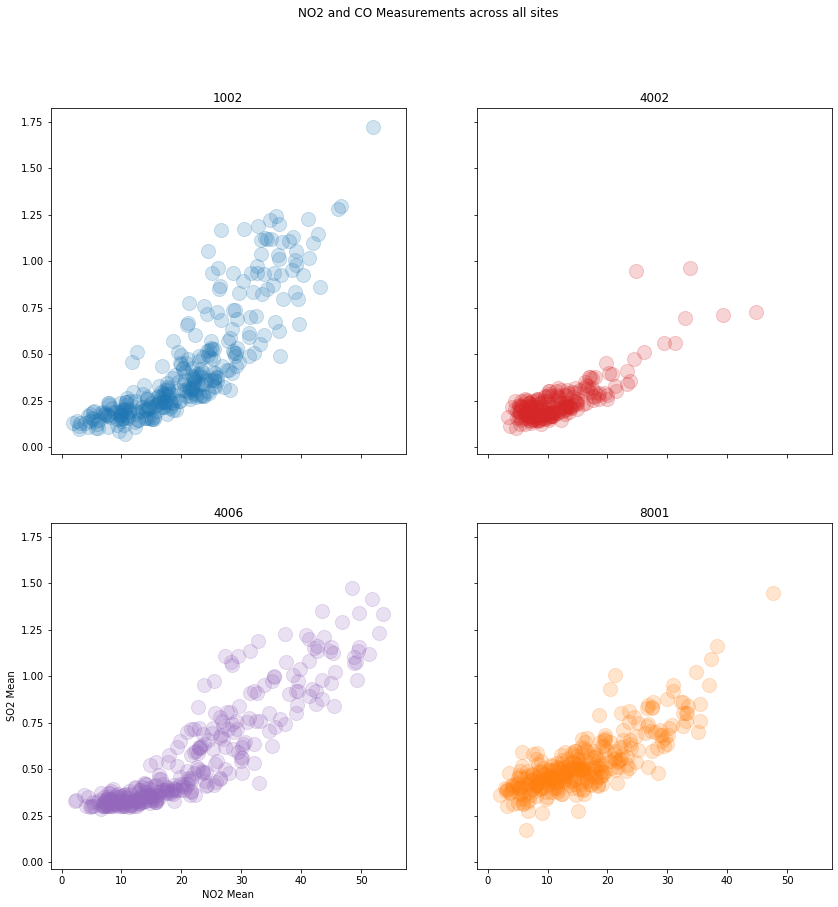

In [60]:
fig, axs = plt.subplots(2,2, figsize=(14, 14), sharex=True, sharey=True)
fig.suptitle("NO2 and CO Measurements across all sites")

size=200
alpha=0.2

axs[0][0].scatter(pollution_df_1002["NO2 Mean"], 
                    pollution_df_1002["CO Mean"],
                    color='tab:blue',
                    s=size,
                    alpha=alpha)
axs[0][0].set_title("1002")


axs[0][1].scatter(pollution_df_4002["NO2 Mean"], 
                    pollution_df_4002["CO Mean"],
                    color='tab:red',
                    s=size,
                    alpha=alpha)
axs[0][1].set_title("4002")

axs[1][0].scatter(pollution_df_4006["NO2 Mean"], 
                    pollution_df_4006["CO Mean"],
                    color='tab:purple',
                    s=size,
                    alpha=alpha)
axs[1][0].set_title("4006")
axs[1][0].set_xlabel("NO2 Mean")
axs[1][0].set_ylabel("SO2 Mean")

axs[1][1].scatter(pollution_df_8001["NO2 Mean"], 
                    pollution_df_8001["CO Mean"],
                    color='tab:orange',
                    s=size,
                    alpha=alpha)
axs[1][1].set_title("8001")


